<h1>Theofilus Arkhi Susanto</h1>
<p>19/439163/PA/18986</p>
<p>Tugas ketiga Deep Learning</p>

In [2]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv("./training.csv")
train.head()

,sepal length,sepal width,petal length,petal width,Nama,y1,y2
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1


In [4]:
train_list=train.values.tolist()
train_list

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa', 1, 1],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa', 1, 1],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa', 1, 1],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa', 1, 1],
 [5.0, 3.6, 1.4, 0.2, 'Iris-setosa', 1, 1],
 [5.4, 3.9, 1.7, 0.4, 'Iris-setosa', 1, 1],
 [4.6, 3.4, 1.4, 0.3, 'Iris-setosa', 1, 1],
 [5.0, 3.4, 1.5, 0.2, 'Iris-setosa', 1, 1],
 [4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 1, 1],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa', 1, 1],
 [5.4, 3.7, 1.5, 0.2, 'Iris-setosa', 1, 1],
 [4.8, 3.4, 1.6, 0.2, 'Iris-setosa', 1, 1],
 [4.8, 3.0, 1.4, 0.1, 'Iris-setosa', 1, 1],
 [4.3, 3.0, 1.1, 0.1, 'Iris-setosa', 1, 1],
 [5.8, 4.0, 1.2, 0.2, 'Iris-setosa', 1, 1],
 [5.7, 4.4, 1.5, 0.4, 'Iris-setosa', 1, 1],
 [5.4, 3.9, 1.3, 0.4, 'Iris-setosa', 1, 1],
 [5.1, 3.5, 1.4, 0.3, 'Iris-setosa', 1, 1],
 [5.7, 3.8, 1.7, 0.3, 'Iris-setosa', 1, 1],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa', 1, 1],
 [5.4, 3.4, 1.7, 0.2, 'Iris-setosa', 1, 1],
 [5.1, 3.7, 1.5, 0.4, 'Iris-setosa', 1, 1],
 [4.6, 3.6, 1.0, 0.2, 'Iris-seto

In [5]:
import math

In [6]:
def result(t1, t2, t3, t4, bias, a, b, c, d):
    return t1*a+t2*b+t3*c+t4*d+bias

def activation(a):
    return 1/(1+math.exp((-1)*a))

def error(target, result):
    return (1/2)*(math.pow(result-target,2))

def predict(a):
    return 1 if a>0.5 else 0

def delta(activation_res, target, feature):
    return 2*(activation_res-target)*(1-activation_res)*activation_res*feature


In [7]:
X = []
ACC = []
ERR = []
PARAMS = []

In [8]:
t11 = t12 = t13 = t14 = t21 = t22 = t23 = t24 = b1 = b2 = 0.5
learning_rate = 0.1

for t in range(1,151):
    ac = 0
    for i in train_list:
        f1, f2, f3, f4, kelas, y1, y2 = i

        res1 = result(t11,t12,t13,t14,b1,f1,f2,f3,f4)
        res2 = result(t21,t22,t23,t24,b2,f1,f2,f3,f4)

        act1 = activation(res1)
        act2 = activation(res2)

        err1 = error(y1,act1)
        err2 = error(y2,act2)

        if predict(act1) == y1 and predict(act2) == y2:
            ac += 1

        t11 = t11-learning_rate*delta(act1,y1,f1)
        t12 = t12-learning_rate*delta(act1,y1,f2)
        t13 = t13-learning_rate*delta(act1,y1,f3)
        t14 = t14-learning_rate*delta(act1,y1,f4)
        b1 = b1-learning_rate*delta(act1,b1,b1)

        t21 = t21-learning_rate*delta(act2,y2,f1)
        t22 = t22-learning_rate*delta(act2,y2,f2)
        t23 = t23-learning_rate*delta(act2,y2,f3)
        t24 = t24-learning_rate*delta(act2,y2,f4)
        b2 = b2-learning_rate*delta(act2,b2,b2)
    #print(t, b1, b2)
    print(t, ac/len(train_list), err1+err2)
    X.append(t)
    ACC.append(ac*100/len(train_list))
    ERR.append((err1+err2)*100)
    PARAMS.append([t11 , t12 ,  t13 ,  t14 , t21 ,  t22 ,  t23 ,  t24 ,  b1 ,  b2])
    

1 0.3333333333333333 0.49989332220123245
2 0.3333333333333333 0.4998800514642182
3 0.3333333333333333 0.49986337061321373
4 0.3333333333333333 0.5000221511480716
5 0.5916666666666667 0.5001672727323929
6 0.5833333333333334 0.5001170903098281
7 0.5833333333333334 0.5000451506263262
8 0.5833333333333334 0.49993019648032466
9 0.5833333333333334 0.4997009644638875
10 0.5833333333333334 0.49899282479393253
11 0.5833333333333334 0.4589321951731952
12 0.8416666666666667 0.0007459529247237146
13 0.8583333333333333 0.0007554754231022848
14 0.875 0.0008085353478555644
15 0.8833333333333333 0.0008531077576364306
16 0.8833333333333333 0.0008766432235096981
17 0.8833333333333333 0.000879354900721441
18 0.8833333333333333 0.0008995881389104654
19 0.8833333333333333 0.0009275138071361832
20 0.8833333333333333 0.0009475647196129811
21 0.8833333333333333 0.0009611397724079629
22 0.8833333333333333 0.0009710835502489605
23 0.8833333333333333 0.0009790344582499759
24 0.8833333333333333 0.0009859515021894

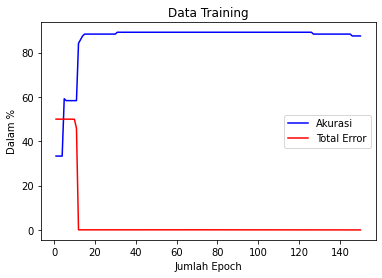

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Jumlah Epoch")
plt.ylabel("Dalam %")
plt.title("Data Training")
plt.plot(X, ACC, color="blue", label="Akurasi")
plt.plot(X, ERR, color="red", label="Total Error")
plt.legend()
plt.show()

Pada data training diatas, Akurasi memuncak di sekitar 31->126 epoch yaitu di angka 89.167%. Pada epoch ke 150, dihasilkan akurasi sebesar 87.5%

Sedangkan Total Error terus berkurang seiring dengan bertambahnya jumlah epoch.

In [10]:
validation=pd.read_csv("./testing.csv")
validation.head()
validation_list=validation.values.tolist()


In [11]:
X_test=[]
ACC_test=[]
ERR_test=[]

In [12]:
for t in range(1,151):
    t11 , t12 ,  t13 ,  t14 , t21 ,  t22 ,  t23 ,  t24 ,  b1 ,  b2 = PARAMS[t-1]
    ac = 0
    for i in validation_list:
        f1, f2, f3, f4, kelas, y1, y2 = i

        res1 = result(t11,t12,t13,t14,b1,f1,f2,f3,f4)
        res2 = result(t21,t22,t23,t24,b2,f1,f2,f3,f4)

        act1 = activation(res1)
        act2 = activation(res2)

        err1 = error(y1,act1)
        err2 = error(y2,act2)

        if predict(act1) == y1 and predict(act2) == y2:
            ac += 1
    X_test.append(t)
    ACC_test.append(ac*100/len(validation_list))
    print(t, ac/len(validation_list), err1+err2)
    ERR_test.append((err1+err2)*100)
    

1 0.3333333333333333 0.4999582826288442
2 0.3333333333333333 0.4999526067984725
3 0.3333333333333333 0.49994536800837314
4 0.3333333333333333 0.5000035239734829
5 0.3333333333333333 0.5000554891601664
6 0.3333333333333333 0.5000275749983395
7 0.3333333333333333 0.49999093592175065
8 0.3333333333333333 0.4999336662484003
9 0.3333333333333333 0.49981764828274733
10 0.3333333333333333 0.4994364687150766
11 0.3333333333333333 0.4419358717587068
12 0.3333333333333333 0.00036540165334532
13 0.3333333333333333 0.0003326301576581624
14 0.6333333333333333 0.0003298786415129744
15 0.6666666666666666 0.0003234945058816436
16 0.6666666666666666 0.0003093937453662277
17 0.6666666666666666 0.00028950361581529983
18 0.6666666666666666 0.00027848390501615983
19 0.6666666666666666 0.00027114071995235816
20 0.6666666666666666 0.00026198808620683133
21 0.6666666666666666 0.0002517356489916513
22 0.6666666666666666 0.00024130067004646578
23 0.6666666666666666 0.0002310943300892098
24 0.6666666666666666 0.

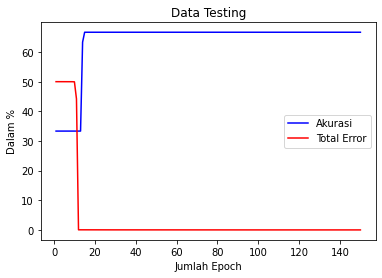

In [13]:
plt.xlabel("Jumlah Epoch")
plt.ylabel("Dalam %")
plt.title("Data Testing")
plt.plot(X_test, ACC_test, color="blue", label="Akurasi")
plt.plot(X_test, ERR_test, color="red", label="Total Error")
plt.legend()
plt.show()

Sesuai grafik diatas, akurasi pada data validasi memuncak di angka 66.67% sampai epoch ke 150.

Nilai error juga mengalami tren penurunan seiring bertambahnya jumlah epoch.